In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
Url = "https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv"

In [3]:
data = pd.read_csv(Url)

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
mean=data.Age.mean()
mean

29.69911764705882

In [9]:
def impute_nan(df,variable,mean):
    df[variable]=df[variable].fillna(mean)

In [10]:
impute_nan(data,'Age',mean)

In [11]:
df=data[['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp','Parch', 'Fare']]

In [49]:
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,223.750,0,3,29.699118,1,0,7.9177
1,223.750,1,2,29.699118,1,0,14.4542
2,223.750,1,3,29.699118,0,0,7.9250
3,223.750,1,2,29.699118,1,0,14.4542
4,223.750,0,3,29.699118,0,0,8.0500
...,...,...,...,...,...,...,...
886,882.001,0,2,29.699118,0,0,13.0000
887,882.001,1,2,29.699118,0,0,14.4542
888,882.001,0,3,29.699118,1,0,23.4500
889,882.001,1,2,29.699118,0,0,14.4542


In [12]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [14]:
def Box_plot(df):
    plt.figure(figsize=(10,4))
    plt.title("Box plot")
    sns.boxplot(df)
    plt.show()
    
def hist_plots(df):
    plt.figure(figsize=(10,4))
    plt.title("Histogram plot")
    plt.hist(df)
    plt.show()
    
def scatter_plots(df1,df2):
    fig,ax = plt.subplots(figsize=(10,4))
    ax.scatter(df1,df2)
    ax.set_xlabel("123")
    ax.set_ylabel("456")
    plt.title("scatter plot")
    plt.show()
    
    
def dist_plots(df):
    plt.figure(figsize=(10,4))
    plt.title("distrinution plot")
    sns.distplot(df)
    sns.despine()
    plt.show()

C:\Users\sony\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


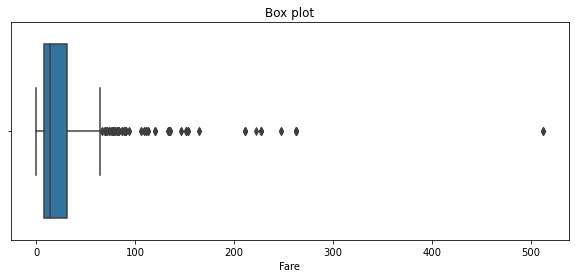

In [15]:
Box_plot(df["Fare"])

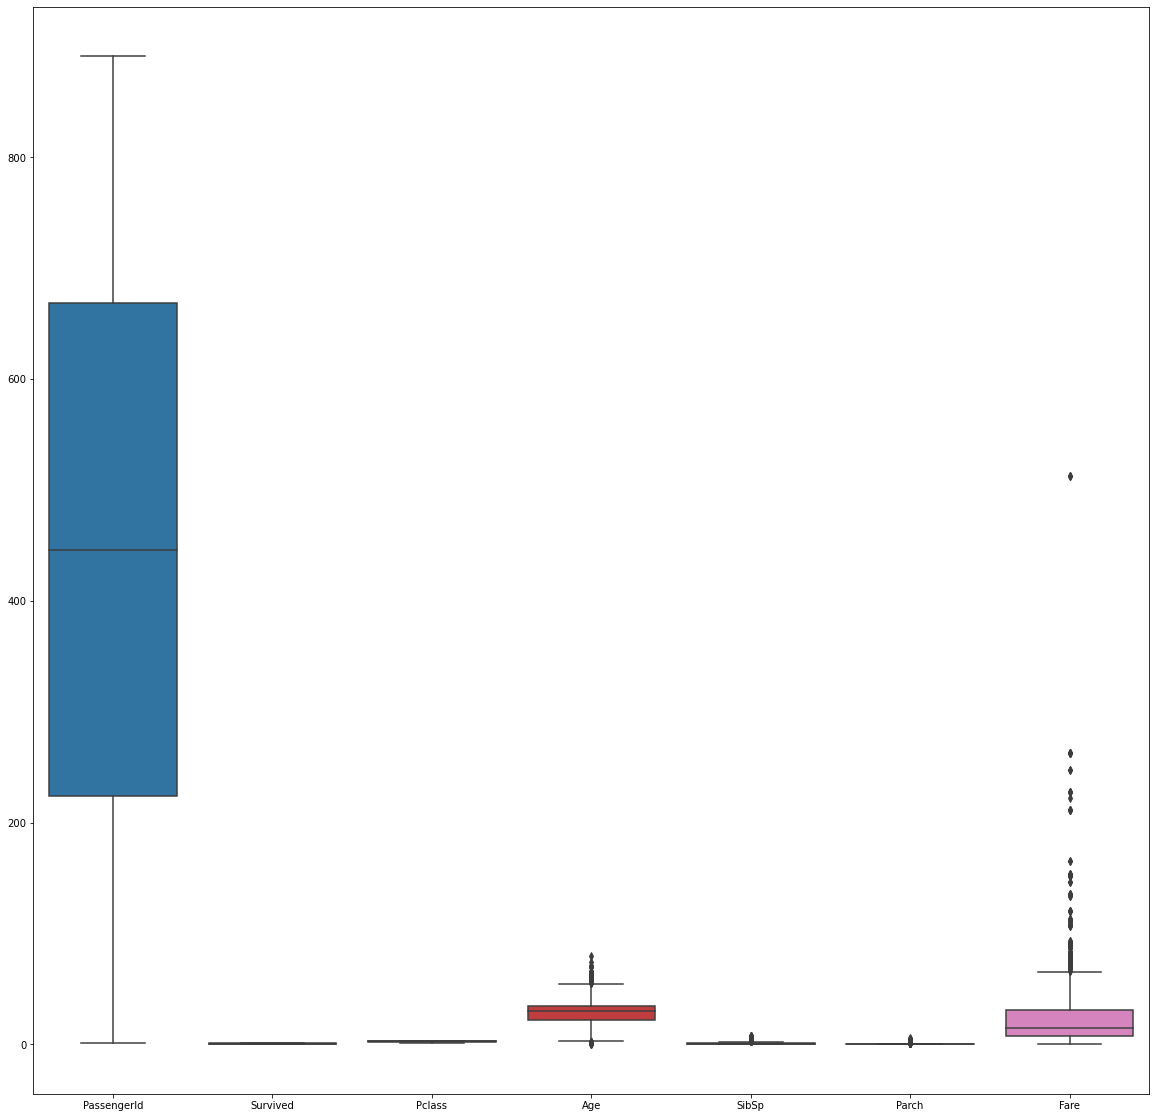

In [13]:
fig , ax = plt.subplots(figsize=(20,20))
sns.boxplot(data= df, ax = ax)
plt.show()

In [16]:
def outlier_data(df):
    for i in df.columns:
        print("capping the ",i)
        for j in df[i]:
            if (((df[i].dtype)=='float64') | ((df[i].dtype)=='int64')):
                
                Q1 = np.quantile(df[i], .25) 
                Q3 = np.quantile(df[i], .75) 
                Q2 = np.quantile(df[i], .50)
                
                IQR = Q3-Q1
                lower = Q1 -(1.5 * IQR) 
                upper = Q3 +(1.5 * IQR)
                
                no_outliers = df[i][(Q1 - 1.5*IQR < df[i]) &  (df[i] < Q3 + 1.5*IQR)]
    
                outliers = df[i][(Q1 - 1.5*IQR > df[i]) |  (df[i] > Q3 + 1.5*IQR)] # or

                lower_fence_otlier=df[i] [(Q1 - 1.5*IQR > df[i])]

                upper_fence_otlier=df[i] [(df[i] > Q3 + 1.5*IQR)]
                
                
            
            
            if j > upper or j < lower:
                df[i]=df[i].replace(j, np.median(df[i]))
                
            else:
                df[i]=df[i]
                
                
                
    print("Quantile-1 (Q1): ",Q1, "\n")
    print("Quantile-2-median (Q2): ",Q2, "\n")
    print("Quantile-3 (Q3): ",Q3, "\n")
    print("Inter Quantile Range (IQR): ",IQR, "\n")
    
    print('lowerBound : ',lower,"\n")
    print('upperBound : ',upper,"\n")
    
    
    
    print('Detection Success',"\n")
    
    print('No_outliers : ',sorted(no_outliers),"\n")
    
    
    
    print('lower_fence_otlier : ',sorted(lower_fence_otlier),"\n")
    
    print('upper_fence_otlier : ',sorted(upper_fence_otlier),"\n")
    
    
    print('Length lower_fence_otlier : ',len(lower_fence_otlier),"\n")
    
    print('Length upper_fence_otlier : ',len(upper_fence_otlier),"\n")
    
    #print('Outliers : ',outliers,"\n")
    
    print('Length Outliers : ',len(outliers),"\n")
    
    
    return lower,upper,df #,outliers            
        
    

final_df=outlier_data(df)

capping the  PassengerId


C:\Users\sony\AppData\Local\Temp/ipykernel_11148/313707280.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i]=df[i]


capping the  Survived
capping the  Pclass
capping the  Age


C:\Users\sony\AppData\Local\Temp/ipykernel_11148/313707280.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i]=df[i].replace(j, np.median(df[i]))


capping the  SibSp
capping the  Parch
capping the  Fare
Quantile-1 (Q1):  7.9104 

Quantile-2-median (Q2):  14.4542 

Quantile-3 (Q3):  14.4542 

Inter Quantile Range (IQR):  6.5438 

lowerBound :  -1.9052999999999995 

upperBound :  24.2699 

Detection Success 

No_outliers :  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0125, 5.0, 6.2375, 6.4375, 6.45, 6.4958, 6.4958, 6.75, 6.75, 6.8583, 6.95, 6.975, 6.975, 7.0458, 7.05, 7.05, 7.05, 7.05, 7.05, 7.05, 7.05, 7.0542, 7.0542, 7.125, 7.125, 7.125, 7.125, 7.1417, 7.225, 7.225, 7.225, 7.225, 7.225, 7.225, 7.225, 7.225, 7.225, 7.225, 7.225, 7.225, 7.2292, 7.2292, 7.2292, 7.2292, 7.2292, 7.2292, 7.2292, 7.2292, 7.2292, 7.2292, 7.2292, 7.2292, 7.2292, 7.2292, 7.2292, 7.25, 7.25, 7.25, 7.25, 7.25, 7.25, 7.25, 7.25, 7.25, 7.25, 7.25, 7.25, 7.25, 7.3125, 7.4958, 7.4958, 7.4958, 7.5208, 7.55, 7.55, 7.55, 7.55, 7.6292, 7.65, 7.65, 7.65, 7.65, 7.725, 7.7292, 7.7333, 7.7333, 7.7333, 7.7333, 7.7375, 7.7375, 7.7417, 7.7

In [50]:
final_df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,223.750,0,3,29.699118,1,0,7.9177
1,223.750,1,2,29.699118,1,0,14.4542
2,223.750,1,3,29.699118,0,0,7.9250
3,223.750,1,2,29.699118,1,0,14.4542
4,223.750,0,3,29.699118,0,0,8.0500
...,...,...,...,...,...,...,...
886,882.001,0,2,29.699118,0,0,13.0000
887,882.001,1,2,29.699118,0,0,14.4542
888,882.001,0,3,29.699118,1,0,23.4500
889,882.001,1,2,29.699118,0,0,14.4542


C:\Users\sony\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


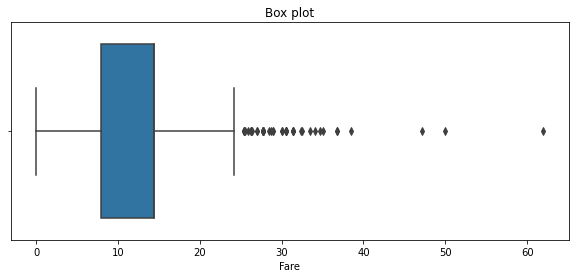

In [18]:
Box_plot(df["Fare"])

In [32]:
df2=data[['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp','Parch', 'Fare']]

In [48]:
df2

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.000000,1,0,7.2500
1,2,1,1,38.000000,1,0,71.2833
2,3,1,3,26.000000,0,0,7.9250
3,4,1,1,35.000000,1,0,53.1000
4,5,0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000
887,888,1,1,19.000000,0,0,30.0000
888,889,0,3,29.699118,1,2,23.4500
889,890,1,1,26.000000,0,0,30.0000


C:\Users\sony\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


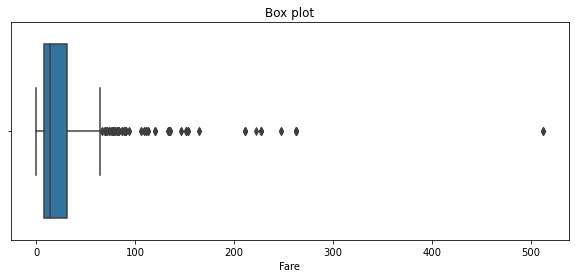

In [33]:
Box_plot(df2["Fare"])

In [35]:
def outlier_data(df):
    for i in df.columns:
        
        print("capping the ",i)
        for j in df[i]:
            if (((df[i].dtype)=='float64') | ((df[i].dtype)=='int64')):
                
                Q1 = np.quantile(df[i], .25) 
                Q3 = np.quantile(df[i], .75) 
                Q2 = np.quantile(df[i], .50)
                
                IQR = Q3-Q1
                lower = Q1 -(1.5 * IQR) 
                upper = Q3 +(1.5 * IQR)
                
                no_outliers = df[i][(Q1 - 1.5*IQR < df[i]) &  (df[i] < Q3 + 1.5*IQR)]
    
                outliers = df[i][(Q1 - 1.5*IQR > df[i]) |  (df[i] > Q3 + 1.5*IQR)] # or

                lower_fence_otlier=df[i] [(Q1 - 1.5*IQR > df[i])]

                upper_fence_otlier=df[i] [(df[i] > Q3 + 1.5*IQR)]
                
                
            
            
                if j > upper :
                    df[i]=df[i].replace(i,upper)

                    if j < lower:
                        df[i]=df[i].replace(i,lower)
                
            else:
                df[i]=df[i]
                
                
                
    print("Quantile-1 (Q1): ",Q1, "\n")
    print("Quantile-2-median (Q2): ",Q2, "\n")
    print("Quantile-3 (Q3): ",Q3, "\n")
    print("Inter Quantile Range (IQR): ",IQR, "\n")
    
    print('lowerBound : ',lower,"\n")
    print('upperBound : ',upper,"\n")
    
    
    
    print('Detection Success',"\n")
    
    print('No_outliers : ',sorted(no_outliers),"\n")
    
    
    
    print('lower_fence_otlier : ',sorted(lower_fence_otlier),"\n")
    
    print('upper_fence_otlier : ',sorted(upper_fence_otlier),"\n")
    
    
    print('Length lower_fence_otlier : ',len(lower_fence_otlier),"\n")
    
    print('Length upper_fence_otlier : ',len(upper_fence_otlier),"\n")
    
    #print('Outliers : ',outliers,"\n")
    
    print('Length Outliers : ',len(outliers),"\n")
    
    
    return lower,upper,df #,outliers            
        
    

final_=outlier_data(df2)

capping the  PassengerId
capping the  Survived
capping the  Pclass
capping the  Age


C:\Users\sony\AppData\Local\Temp/ipykernel_11148/2971718671.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i]=df[i].replace(i,upper)


capping the  SibSp
capping the  Parch
capping the  Fare
Quantile-1 (Q1):  7.9104 

Quantile-2-median (Q2):  14.4542 

Quantile-3 (Q3):  31.0 

Inter Quantile Range (IQR):  23.0896 

lowerBound :  -26.724 

upperBound :  65.6344 

Detection Success 

No_outliers :  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0125, 5.0, 6.2375, 6.4375, 6.45, 6.4958, 6.4958, 6.75, 6.75, 6.8583, 6.95, 6.975, 6.975, 7.0458, 7.05, 7.05, 7.05, 7.05, 7.05, 7.05, 7.05, 7.0542, 7.0542, 7.125, 7.125, 7.125, 7.125, 7.1417, 7.225, 7.225, 7.225, 7.225, 7.225, 7.225, 7.225, 7.225, 7.225, 7.225, 7.225, 7.225, 7.2292, 7.2292, 7.2292, 7.2292, 7.2292, 7.2292, 7.2292, 7.2292, 7.2292, 7.2292, 7.2292, 7.2292, 7.2292, 7.2292, 7.2292, 7.25, 7.25, 7.25, 7.25, 7.25, 7.25, 7.25, 7.25, 7.25, 7.25, 7.25, 7.25, 7.25, 7.3125, 7.4958, 7.4958, 7.4958, 7.5208, 7.55, 7.55, 7.55, 7.55, 7.6292, 7.65, 7.65, 7.65, 7.65, 7.725, 7.7292, 7.7333, 7.7333, 7.7333, 7.7333, 7.7375, 7.7375, 7.7417, 7.75, 7.75, 7.75,

C:\Users\sony\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


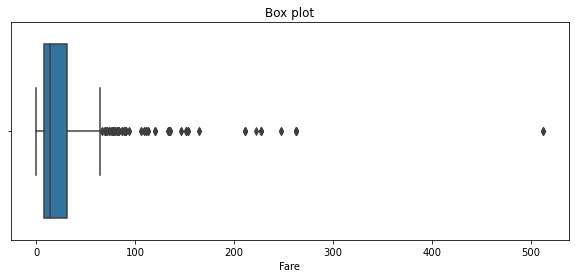

In [36]:
Box_plot(df2["Fare"])

In [37]:
final_

(-26.724,
 65.6344,
      PassengerId  Survived  Pclass        Age  SibSp  Parch     Fare
 0              1         0       3  22.000000      1      0   7.2500
 1              2         1       1  38.000000      1      0  71.2833
 2              3         1       3  26.000000      0      0   7.9250
 3              4         1       1  35.000000      1      0  53.1000
 4              5         0       3  35.000000      0      0   8.0500
 ..           ...       ...     ...        ...    ...    ...      ...
 886          887         0       2  27.000000      0      0  13.0000
 887          888         1       1  19.000000      0      0  30.0000
 888          889         0       3  29.699118      1      2  23.4500
 889          890         1       1  26.000000      0      0  30.0000
 890          891         0       3  32.000000      0      0   7.7500
 
 [891 rows x 7 columns])

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (3,) + inhomogeneous part.

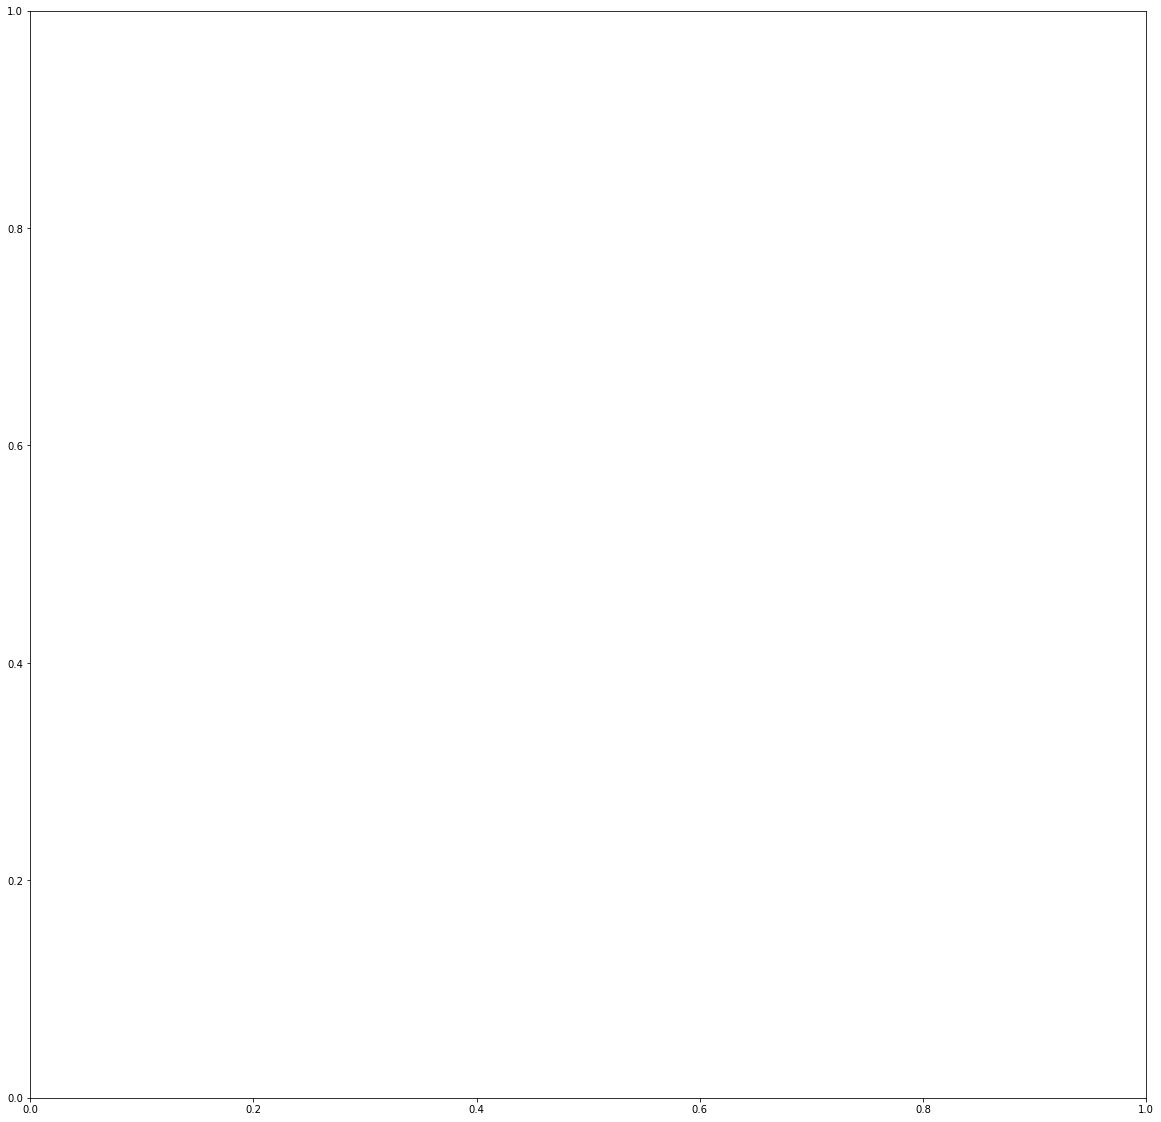

In [38]:
fig , ax = plt.subplots(figsize=(20,20))
sns.boxplot(data= final_, ax = ax)
plt.show()

In [55]:
def cap_data(df):
    for col in df.columns:
        print("capping the ",col)
        if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
            
            Q1 = np.quantile(df[col], .25) 
            Q3 = np.quantile(df[col], .75) 
            Q2 = np.quantile(df[col], .50)   
            IQR = Q3-Q1
            lower = Q1 -(1.5 * IQR) 
            upper = Q3 +(1.5 * IQR)
            
                if df[col] > upper :
                    df[col]=df[col].replace(col,upper)
                        if df[col] < lower:
                            df[col]=df[col].replace(col,lower)
        else:
            df[col]=df[col]
    return df

final_df=cap_data(df)

IndentationError: unexpected indent (Temp/ipykernel_11148/2434772890.py, line 12)

In [47]:
final_df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,223.750,0,3,29.699118,1,0,7.9177
1,223.750,1,2,29.699118,1,0,14.4542
2,223.750,1,3,29.699118,0,0,7.9250
3,223.750,1,2,29.699118,1,0,14.4542
4,223.750,0,3,29.699118,0,0,8.0500
...,...,...,...,...,...,...,...
886,882.001,0,2,29.699118,0,0,13.0000
887,882.001,1,2,29.699118,0,0,14.4542
888,882.001,0,3,29.699118,1,0,23.4500
889,882.001,1,2,29.699118,0,0,14.4542


C:\Users\sony\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


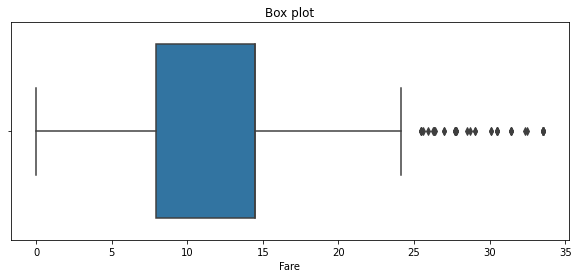

In [43]:
Box_plot(final_df["Fare"])

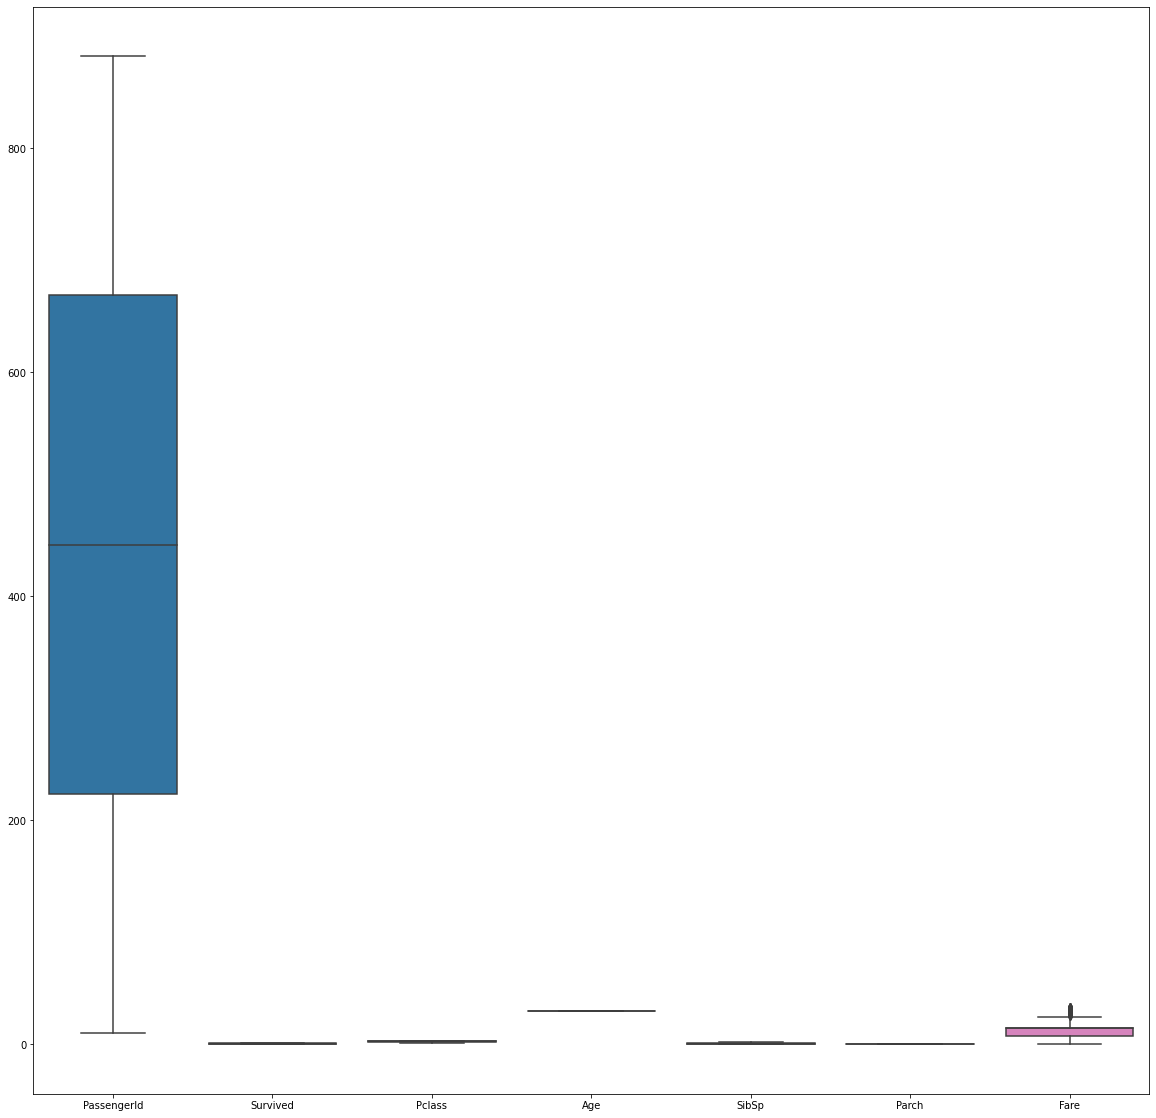

In [42]:
fig , ax = plt.subplots(figsize=(20,20))
sns.boxplot(data= final_df, ax = ax)
plt.show()

In [ ]:
def outlier_tratment(df):
    for i in df:
        for j in df[i]:
            Q1 = np.quantile(df[i], .25) 
            Q3 = np.quantile(df[i], .75) 
            Q2 = np.quantile(df[i], .50)
        
            IQR = Q3-Q1
            
            lower = Q1 -(1.5 * IQR) 
            upper = Q3 +(1.5 * IQR)
            
            #lower_outlier.append(lower)
            #upper_outlier.append(upper)
            
            if j > upper or j < lower:
                df[i]=df[i].replace(j, np.median(df[i]))
                
            else:
                df[i]=df[i]
            
    return df
                
    print("lower outlier are",set(lower_outlier))
    print('Upper outlier are',set(upper_outlier))

In [ ]:
outlier_tratment(data)

In [44]:
df["Fare"][df["Fare"] <= percentiles[0]]

NameError: name 'percentiles' is not defined

In [ ]:
threshold = 10
for i in data.columns:
    if data[i].nunique() < threshold:
        data.append(i)
        
for i in category_features:
    ata[each] = data[i].astype('category')        

In [ ]:
Box_plot(data["Fare"])

In [ ]:
hist_plots(data["Fare"])

In [ ]:
Box_plot(data["Age"])

In [ ]:
hist_plots(data["Age"])

In [ ]:
data._get_numeric_data()

In [ ]:

def outlier_tratment(df):
    for i in df:
        for j in df[i]:
            Q1 = np.quantile(df[i], .25) 
            Q3 = np.quantile(df[i], .75) 
            Q2 = np.quantile(df[i], .50)
        
            IQR = Q3-Q1
            lower = Q1 -(1.5 * IQR) 
            upper = Q3 +(1.5 * IQR)
            lower_outlier.append(lower)
            upper_outlier.append(upper)
            if j > upper or j < lower:
                df[i]=df[i].replace(j, np.median(df[i]))
    print("lower outlier are",set(lower_outlier))
    print('Upper outlier are',set(upper_outlier))

In [ ]:
outlier_tratment(data)

In [ ]:
# Numerical columns
numericCols = data._get_numeric_data().columns
print("Numerical: {}".format(numericCols))   

# Categorical columns
categorical = data.select_dtypes(include=['category'])
print("Categorical: {}".format(categorical))

In [ ]:
nums = {'num': [ 10,20,50,40,80,1000,900,950,100,50,500,120,15,160,200,300,25,240,300,290,45,5],
        #'Roll No.': [ 0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2],
       }

In [ ]:
df = pd.DataFrame(nums)
  
    
df

In [ ]:
def Box_plot(df):
    plt.figure(figsize=(10,4))
    plt.title("Box plot")
    sns.boxplot(df)
    plt.show()
    
def hist_plots(df):
    plt.figure(figsize=(10,4))
    plt.title("Histogram plot")
    plt.hist(df)
    plt.show()

In [ ]:
Box_plot(df["num"])

In [ ]:
lower_outlier=[]
upper_outlier=[]

def outlier_tratment(df):
    for i in df:
        for j in df[i]:
            Q1 = np.quantile(df[i], .25) 
            Q3 = np.quantile(df[i], .75) 
            Q2 = np.quantile(df[i], .50)
        
            IQR = Q3-Q1
            lower = Q1 -(1.5 * IQR) 
            upper = Q3 +(1.5 * IQR)
            
            lower_outlier.append(lower)
            
            upper_outlier.append(upper)
            
            if j > upper or j < lower:
                
                df[i]=df[i].replace(j, np.median(df[i]))
                
    print("lower outlier are",set(lower_outlier),"\n")
    print('Upper outlier are',set(upper_outlier))

In [ ]:
outlier_tratment(df)

In [ ]:
Box_plot(df["num"])

In [ ]:
df1=df
df1